Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Exploration Data Analysis (EDA) Variabile Testuale "Descrizione del Bene"


- **1.** **Text Data Cleaning**;


- **2.** **Text Feature Engineering**;
    - **2.1** Creo nuova colonna derivante da **Numero parole per descrizione**;
    - **2.2** Creo nuova colonna derivante da **Media del numero di caratteri per parola per descrizione**;


- **3.** **Data Visualization**
    - **3.1** **Distribuzione del numero di parole per descrizione**;
    - **3.2** **Distribuzione del numero di parole per descrizione per destinazione d'uso**;
    - **3.3** **Distribuzione del numero medio di caratteri per parola per descrizione**;
    - **3.4** **distribuzione del numero di caratteri medio per parola per destinazione d'uso**;
    

- **4.** **Distribuzione** degli **Unigram**, **Bigram** & **Trigram**;
    - **Creo nuova colonna derivante dal campo descrizione del bene, senza capital letter e senza punctuation**;
    - **4.1** **Distribuzione degli Unigram**;
    - **4.2** **Distribuzione dei Bigram**;
    - **4.3** **Distribuzione dei Trigram**;
    

- **5.** **WordCloud** del campo **Descrizione del bene**, pulito e pre-processato;
    - **5.1** **WordCloud** delle **stringhe più menzionate** per i beni **in generale**;
    - **5.2** **WordCloud** delle **stringhe più menzionate** per i beni **RESIDENTIAL**;
    - **5.3** **WordCloud** delle **stringhe più menzionate** per i beni **RETAIL**;
    - **5.4** **WordCloud** delle **stringhe più menzionate** per i beni **LAND**;
    - **5.5** **WordCloud** delle **stringhe più menzionate** per i beni **INDUSTRIAL**;
    - **5.6** **WordCloud** delle **stringhe più menzionate** per i beni **STORAGE**;
    - **5.7** **WordCloud** delle **stringhe più menzionate** per i beni **HOTEL**;
    - **5.8** **WordCloud** delle **stringhe più menzionate** per i beni **AGRICULTURAL BUILDING**; 


- **6.** **Elimino gli outliers trovati grazie alla exploration data analysis**;


- **7.** **Conclusioni**;


- **8.** **Export** data frame in formato **CSV**;


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import math
import plotly.express as px
import warnings
from matplotlib import cm
from PIL import Image
import string
import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None

**Importo file CSV**

In [3]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\7_Dataset_EDA_Pre_Bilanciamento\\Dataset_EDA_Testi.csv",
                 dtype={'Numero_Lotto' : 'Int64'})

### 1 - Text Data Cleaning
#### Elimino i caratteri speciali presenti nella descrizione e salvo la colonna pulita in una nuova variabile "Descrizione_Bene_Clean":

In [4]:
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene'].replace(r"\\", " ")
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("Ã\xa0", "à", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace("all\\''", "all'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace("l\\'", "l'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace(" l\\'", " l'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace("lâ€™", "l'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace("All\\'", "All'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("L\\'", "L'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("          ", " ", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace(r"\'", "'", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace(r"nonchÃ©", "nonchè", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace(r"â€“", "—", regex=True)
caratteri_eliminare = ["\r\n", " \r\n ", "\r\n-", "\n", "\\", "\\\\"]
for char in caratteri_eliminare:
    df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace(char, '', regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].replace(to_replace= r'\\', value= '', regex=True)

In [5]:
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("/", " / ", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("+", " + ", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("-", " - ", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("UNITA'UNIFAMILIARE", "UNITA' UNIFAMILIARE", regex=True)
df['Descrizione_Bene_Clean'] = df['Descrizione_Bene_Clean'].str.replace("Miniappartamento.", "Mini appartamento.", regex=True)

### 2 - Feature Engineering dalla variabile testuale

- **2.1** **Numero parole per descrizione**

In [6]:
# Conto il numero di parole per testo descrittivo:
df["N_Parole"] = df['Descrizione_Bene_Clean'].apply(lambda x: len(x.split()))

- **2.2** **Numero caratteri per parola per descrizione**

In [7]:
# Creo una funzione per misurare il numero medio di caratteri per parola contenuta nel testo:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len / len(words)

# Applico la funzione alla descrizione del testo pulita e creo una nuova colonna:
df['avg_word_len'] = df['Descrizione_Bene_Clean'].apply(lambda x: get_avg_word_len(x)).round(4)

### 3 - Text Data Visualization

- **3.1** **Distribuzione del numero di parole per descrizione**

In [8]:
# Salvo in una nuova variabile il numero medio di parole nella colonna numero parole per ogni descrizione:
mean_N_word = df['N_Parole'].mean()

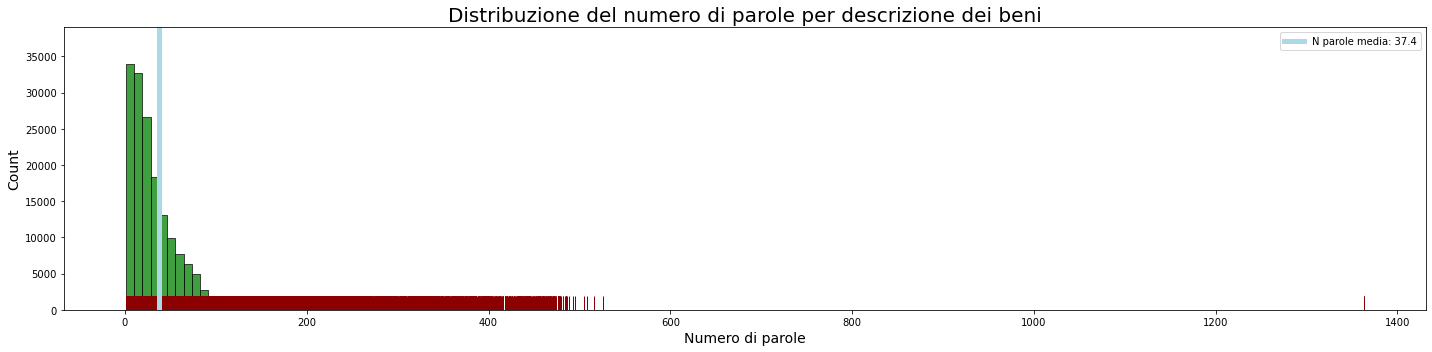

In [9]:
fig, ax2 = plt.subplots(1, figsize=(20, 5))
sns.histplot(data=df, x='N_Parole', bins=150, ax=ax2, color="green")
sns.rugplot(data=df, x="N_Parole", height=.05, color="darkred")
ax2.axvline(x= mean_N_word, color='lightblue', linestyle='solid', linewidth=5, label=f'N parole media: {mean_N_word:.1f}')
plt.title("Distribuzione del numero di parole per descrizione dei beni", size=20)
plt.ylabel("Count", size=14)
plt.xlabel("Numero di parole", size=14)
ax2.legend()

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Distribuzione_N_Parole.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- La **maggior parte dei testi** presenta un **numero di parole tra 1 e 100**;
- Ci sono valori diffusi, ma in minore quantità, **tra le 100 parole e le 400 parole**;
- Infine esiste un **outliers posizionato intorno alle 1400 parole**.

#### Salvo la posizione dell'indice del bene che presenta quasi 1400 parole nella sua descrizione per eliminarla dal data frame:

In [10]:
df_longest = df[df['N_Parole'] > 1200]
print("Indice del bene con il numero maggiore di parole nella descrizione: ", '\033[1m','\033[15;31;43m', df_longest.index[0])

Indice del bene con il numero maggiore di parole nella descrizione:    119691


- **3.2** Mostro la **distribuzione** del **numero** di **parole** per **descrizione per destinazione d'uso**

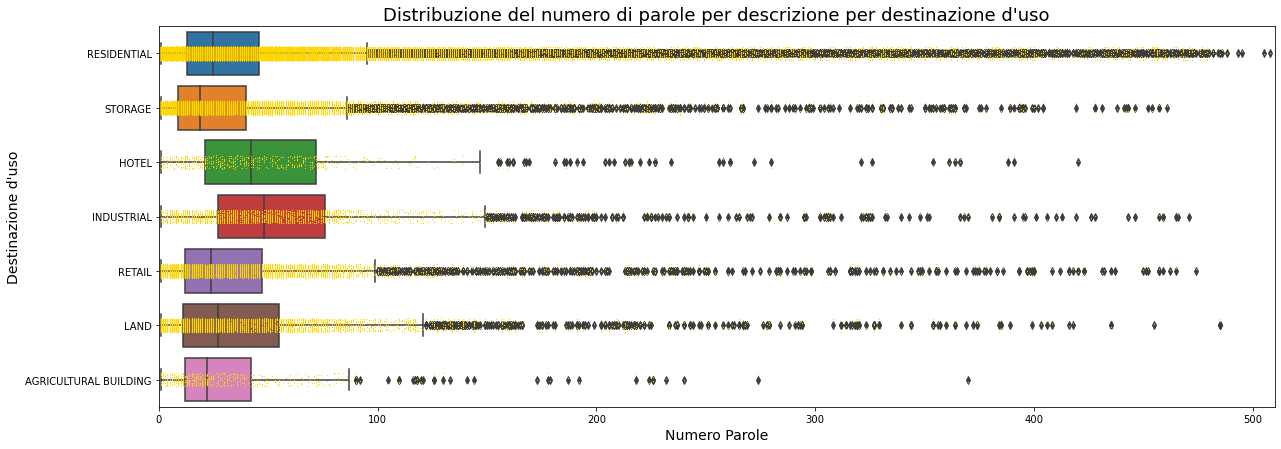

In [11]:
plt.figure(figsize = (20, 7))
plt.xlim(right=510)
sns.boxplot(data = df, x = df["N_Parole"], y = "Destinazione_Uso", hue = "Destinazione_Uso", dodge=False)
sns.stripplot(x = df["N_Parole"], y = "Destinazione_Uso", data=df, color="gold", jitter=0.125, size=1.15)
plt.xlabel('Numero Parole', fontsize=14)
plt.ylabel("Destinazione d'uso", fontsize=14)
plt.title("Distribuzione del numero di parole per descrizione per destinazione d'uso", fontsize=18)

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Distribuzione_N_Parole_Destinazione.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.legend('', frameon=False)
plt.show()

- C'è **un solo bene** che **supera le 1200** parole. Il medesimo bene verrà eliminato dal data frame in quanto **outlier**;
- Come scoperto per il **numero di caratteri**, anche il **numero di parole** è vede i beni **INDUSTRIAL** come i **più lunghi**, seguiti dagli **HOTEL**;
- I beni **STORAGE** e **AGRICULTURAL BUILDING** sono quelli invece che presentano il **minor numero di parole** per descrizione.

- **3.3** **Distribuzione del numero medio di caratteri per parola per descrizione**

In [12]:
# Salvo in una nuova variabile il numero medio di parole per il campo descrizione del bene per ogni bene nel data frame:
mean_N_Character = df['avg_word_len'].mean()

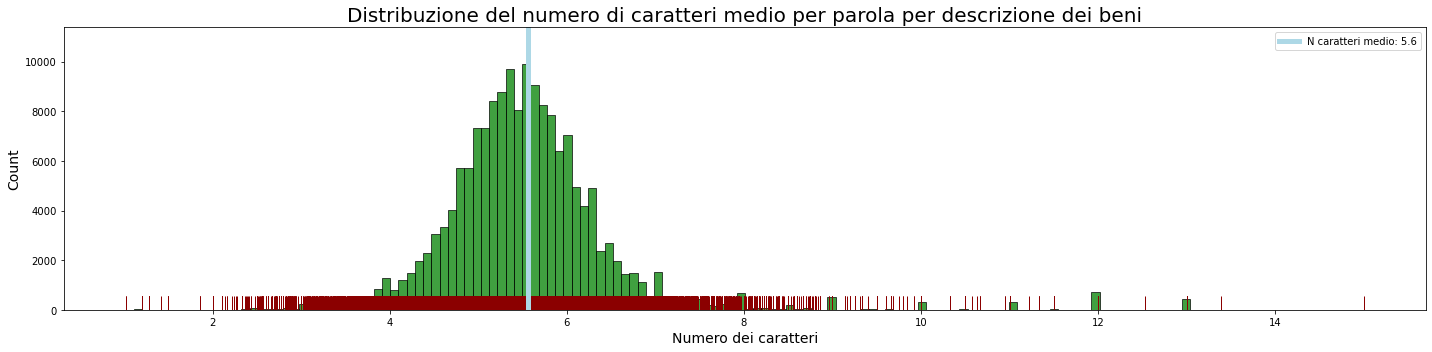

In [13]:
fig, ax2 = plt.subplots(1, figsize=(20, 5))
sns.histplot(data=df, x='avg_word_len', bins=150, ax=ax2, color="green")
sns.rugplot(data=df, x="avg_word_len", height=.05, color="darkred")
ax2.axvline(x=mean_N_Character, color='lightblue', linestyle='solid', linewidth=5, label=f'N caratteri medio: {mean_N_Character:.1f}')
plt.title("Distribuzione del numero di caratteri medio per parola per descrizione dei beni", size=20)
plt.ylabel("Count", size=14)
plt.xlabel("Numero dei caratteri", size=14)
ax2.legend()

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\DistribuzioneN_Medio_Caratteri_Parola.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- Ci sono diversi beni che presentano un numero medio di caratteri particolarmente ambigui, per esempio quelli **oltre i 13 caratteri** e **sotto i 2 caratteri**, che in totale sono: **37**;
- Per la maggior parte dei beni invece il numero **medio di caratteri per parola si aggira intorno ai 5 o 6 caratteri**, di fatti la **media è di 5.6** caratteri per parola per descrizione;

#### Ora salvo la posizione dell'indice di questi 37 beni che presentano medie eclatanti per eliminarli dal data frame.

In [14]:
df_longest_avg = df[(df['avg_word_len'] < 2) | (df['avg_word_len'] > 13)]
index_values = df_longest_avg.index.tolist()
index_string = ', '.join(map(str, index_values))
print("Indici dei beni con il numero maggiore o minore di caratteri per descrizione: \n",
      '\033[1m','\033[15;31;43m', index_string, "\033[0m")

Indici dei beni con il numero maggiore o minore di caratteri per descrizione: 
   12760, 17292, 32842, 32843, 32844, 32845, 32846, 32847, 32848, 32849, 32850, 32851, 32852, 32853, 32854, 32855, 32856, 32859, 32860, 32861, 32862, 32863, 32864, 32865, 32866, 32867, 32868, 47972, 47973, 47974, 77021, 77042, 77043, 77044, 119691, 119692, 156550 


- **3.4** **Mostro la distribuzione del numero di caratteri medio per parola per destinazione d'uso**:

<Figure size 1440x504 with 0 Axes>

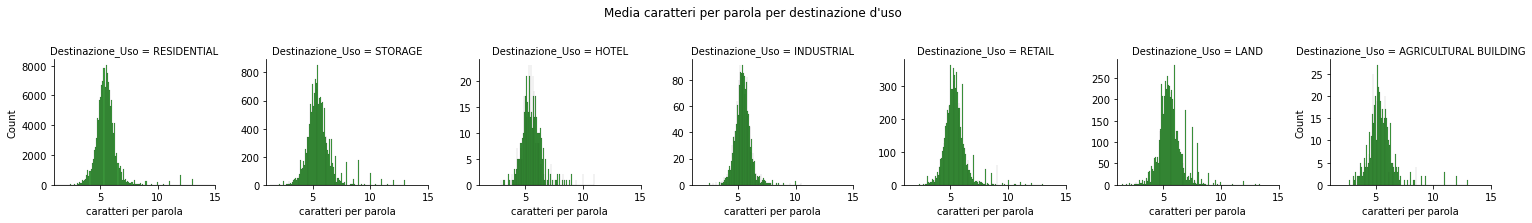

In [15]:
plt.figure(figsize=(20, 7)) 
g = sns.FacetGrid(df, col='Destinazione_Uso', sharex=False, sharey=False)
g.map(sns.histplot, 'avg_word_len', bins=150, color="Green")
for ax in g.axes.flat:
    ax.set_xlim(left=1, right=15)
g.set_axis_labels("caratteri per parola", "Count")
g.fig.suptitle("Media caratteri per parola per destinazione d'uso", y=1.02)
plt.ylabel("Count")

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\DistribuzioneN_Medio_Caratteri_Parola_Destinazione.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- La **lunghezza media** delle parole presenti nelle descrizioni dei testi risulta essere pressochè **identica per destinazione d'uso**;
- La **maggior parte dei testi** presentano una **lunghezza media per parola intorno ai 5 caratteri**;
- Le **parole più brevi** sono per la categoria **INDUSTRIAL**, mentre le **più lunghe** per la destinazione d'uso **AGRICULTURAL BUILDING**.

### 4 - Distribuzione degli Unigram, Bigram & Trigram

#### Creo una nuova colonna partendo dai testi delle descrizioni, togliendo tutte le punteggiature e mettendo tutto in minuscolo:

In [16]:
df["Descrizione_Bene_EDA"] = df["Descrizione_Bene_Clean"].str.replace('[^\w\s]', '', regex=True).str.lower()

- **4.1** **UNIGRAM: Numero Totale e Conteggio dei top 15 Unigram:**

N° Unigram non comuni estratti dal testo delle descrizioni:   87604 


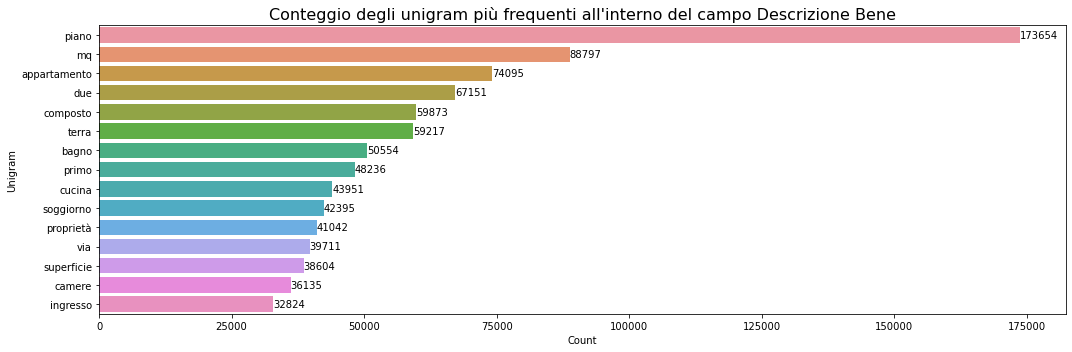

In [17]:
# Creo una funzione che mi aiuti a tokenizzare e a contare il numero di tokens, dopo aver rimosso le stop words:
def get_top_n_words(x):
    # Indico il vocabolario da utilizzare per la funzione stop words:
    stop_words = set(stopwords.words('italian'))
    # Applico la funzione stopwords
    x = x.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
    # Instanzio la funzione countvectorizer e lo applico alla colonna del data frame del testo pulito:
    vec = CountVectorizer().fit(x)
    # Bag of Words:
    bow = vec.transform(x)
    # Sommo il numero di parole occorse all'interno dei testi precedentemente tokinzzati:
    sum_words = bow.sum(axis = 0)
    # Per ogni parola tokenizzata, conto il numero di volte che essa compare:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

# Applico la funzione creata al campo testo pulito del mio data frame e salvo il risultato in un nuovo data frame:
unigram = get_top_n_words(df["Descrizione_Bene_EDA"])
df_unigram = pd.DataFrame(unigram, columns = ["Unigram", "Count"])
# Conto il numero totale di parole non comuni estratte dal testo pulito:
print("N° Unigram non comuni estratti dal testo delle descrizioni:",'\033[1m','\033[15;31;43m',df_unigram.shape[0],'\033[0m')

# Plotto il conteggio dei top 15 unigram trovati:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_unigram[:15], x='Count', y='Unigram')
plt.title("Conteggio degli unigram più frequenti all'interno del campo Descrizione Bene", size=16)
plt.xlabel('Count', size=10)
plt.ylabel('Unigram', size=10)
for i, v in enumerate(df_unigram[:15]["Count"]):
    ax.text(v + 3, i, str(v), va='center', fontsize=10, color='black')
    
# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Conteggio_Unigram.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- Il **numero di parole non comuni** all'interno delle descrizioni dei beni sono **87.604**, ovvero le stringhe più frequenti all'interno del campo descrizione, pulito da punteggiatura, stopwords e con solo parole in minuscolo;
- La **parole più usate** sono: **piano**, **mq** e **appartamento**, tutte sopra le **70.000 volte**;

- **4.2** **BIGRAM: Numero Totale e Conteggio dei top 15 Bigram:**

N° Bigram non comuni estratti dal testo delle descrizioni:   621965 


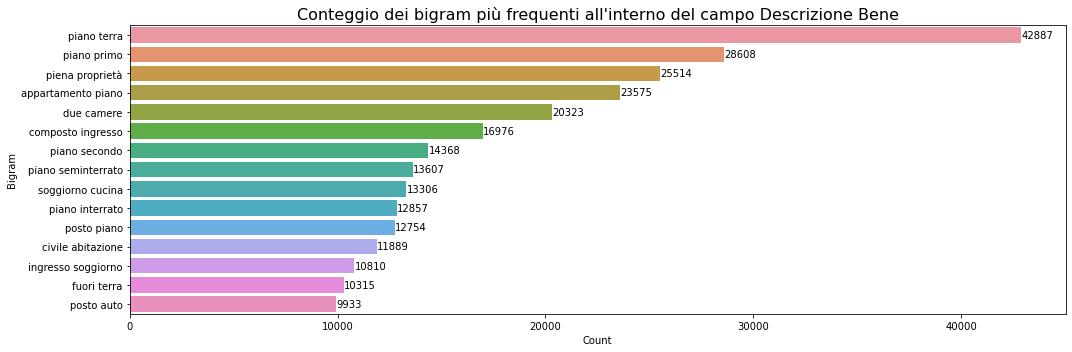

In [18]:
# Creo una funzione che mi aiuti a tokenizzare e a contare il numero di bigrams, dopo aver rimosso le stop words:
def get_top_bigrams(x):
    # Indico il vocabolario da utilizzare per la funzione stop words:
    stop_words = set(stopwords.words('italian'))
    # Applico la funzione stopwords
    x = x.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
    # Instanzio la funzione countvectorizer e lo applico alla colonna del data frame del testo pulito.
    # Il parametro aggiuntivo da settare per ottenere le duppie stringhe: ngram_range=(2, 2).
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x) 
    # Bag of Words:
    bow = vec.transform(x)
    # Sommo il numero di parole occorse all'interno dei testi precedentemente tokinzzati:
    sum_words = bow.sum(axis = 0)
    # Per ogni parola tokenizzata, conto il numero di volte che essa compare:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

# Applico la funzione creata al campo testo pulito del mio data frame e salvo il risultato in un nuovo data frame:
bigram = get_top_bigrams(df["Descrizione_Bene_EDA"])
df_bigram = pd.DataFrame(bigram, columns = ["Bigram", "Count"])
# Conto il numero totale di parole non comuni estratte dal testo pulito:
print("N° Bigram non comuni estratti dal testo delle descrizioni:",'\033[1m','\033[15;31;43m', df_bigram.shape[0], '\033[0m')

# Plotto il conteggio dei top 15 bigram trovati:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_bigram[:15], x='Count', y='Bigram')
plt.title("Conteggio dei bigram più frequenti all'interno del campo Descrizione Bene", size=16)
plt.xlabel('Count', size=10)
plt.ylabel('Bigram', size=10)
for i, v in enumerate(df_bigram[:15]["Count"]):
    ax.text(v + 3, i, str(v), va='center', fontsize=10, color='black')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Conteggio_Bigram.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- In totale i bigrams sono **621.965**, ovvero le **coppie di stringhe più frequenti** all'interno del campo descrizione pulito da punteggiatura, stopwords e con solo parole in minuscolo.
- I **bigrams** che superano le **20.000** counts sono solo cinque e sono: **"due camere"**, **"appartamento piano"**, **"piena proprietà"**, **"piano primo"**, e **"piano terra"**.

- **4.3** **TRIGRAM: Numero Totale e Conteggio dei top 15 Trigram:**

N° Trigram non comuni estratti dal testo delle descrizioni:   1340317 


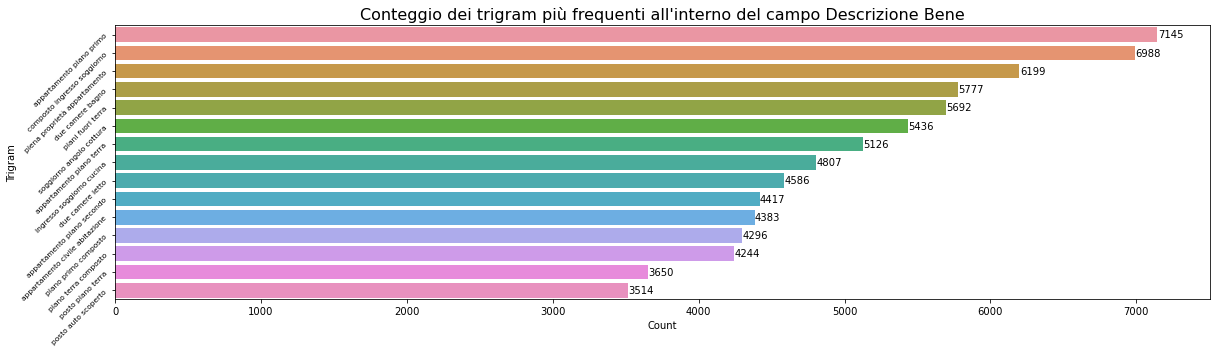

In [28]:
# Creo una funzione che mi aiuti a tokenizzare e a contare il numero di trigrams, dopo aver rimosso le stop words:
def get_top_trigrams(x):
    # Indico il vocabolario da utilizzare per la funzione stop words:
    stop_words = set(stopwords.words('italian'))
    # Applico la funzione stopwords
    x = x.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
    # Instanzio la funzione countvectorizer e lo applico alla colonna del data frame del testo pulito.
    # Il parametro aggiuntivo da settare per ottenere le triple stringhe: ngram_range=(3, 3).
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x) 
    # Bag of Words:
    bow = vec.transform(x)
    # Sommo il numero di parole occorse all'interno dei testi precedentemente tokinzzati:
    sum_words = bow.sum(axis = 0)
    # Per ogni parola tokenizzata, conto il numero di volte che essa compare:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

# Applico la funzione creata al campo testo pulito del mio data frame e salvo il risultato in un nuovo data frame:
trigram = get_top_trigrams(df["Descrizione_Bene_EDA"])
df_trigram = pd.DataFrame(trigram, columns = ["Trigram", "Count"])
# Conto il numero totale di Trigram non comuni estratte dal testo pulito:
print("N° Trigram non comuni estratti dal testo delle descrizioni:",'\033[1m','\033[15;31;43m', df_trigram.shape[0], '\033[0m')

# Plotto il conteggio dei top 15 trigram trovati:
plt.figure(figsize=(17,5))
ax = sns.barplot(data=df_trigram[:15], x='Count', y='Trigram')
plt.title("Conteggio dei trigram più frequenti all'interno del campo Descrizione Bene", size=16)
plt.xlabel('Count', size=10)
plt.ylabel('Trigram', size=10)
for i, v in enumerate(df_trigram[:15]["Count"]):
    ax.text(v + 3, i, str(v), va='center', fontsize=10, color='black')

ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=7.5)

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Conteggio_Trigram.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- In totale i **trigrams** sono **1.340.317**, ovvero le triple di stringhe più frequenti all'interno del campo descrizione pulito da punteggiatura, stopwords e con solo parole in minuscolo.


- Solo cinque trigrams superano i 5000 counts, ovvero:
    - **"appartamento primo piano"**;
    - **"composto ingresso soggiorno"**;
    - **"piena proprietà appartamento"**;
    - **"due camere bagno"**;
    - **"piani fuori terra"**;

### 5 - Distribuzione dei top 20 part of speech tags (POS)

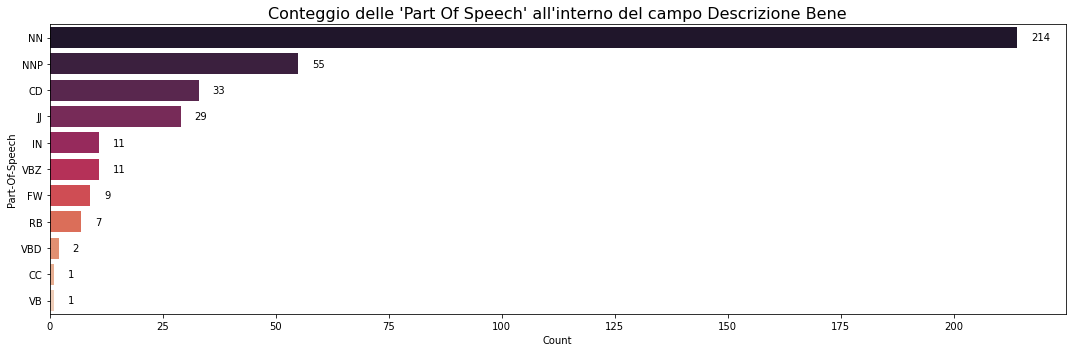

In [20]:
# Scarico le parti di libreria di TextBlob utili per fare l'analisi:
#nltk.download("punkt")
#nltk.download("averaged_perceptron_tagger")
#nltk.download('tagsets')
#print(nltk.help.upenn_tagset())
#blob.tags

# Utilizzo la funzione TextBlob di NLTK sul campo "descrizione pulita":
blob = TextBlob(str(df["Descrizione_Bene_Clean"]))

# Creo un nuovo data frame partendo dai part of speech presenti nel campo descrizione pulita:
pos_df = pd.DataFrame(blob.tags, columns = ["Parole", "POS"])
pos_df_count = pos_df["POS"].value_counts()
pos_df_count = pos_df_count.reset_index()
pos_df_count.columns = ['POS', 'Count']

# Plotto la distribuzione dei tags riferiti al campo descrizione pulita:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=pos_df_count[:20], x="Count", y="POS", palette="rocket")
plt.title("Conteggio delle 'Part Of Speech' all'interno del campo Descrizione Bene", size=16)
plt.xlabel('Count', size=10)
plt.ylabel('Part-Of-Speech', size=10)
for i, v in enumerate(pos_df_count[:20]["Count"]):
    ax.text(v + 3, i, str(v), va='center', fontsize=10, color='black')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\Conteggio_POS.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()
plt.show()

- Ci sono **214 NN** come categoria di Tag principale, equivalente ai **Noun**, ovvero i sostantivi;
- Ci sono **55 NNP** come categoria di Tag secondaria, quivalente ai **Noun proper**, ovvero i nomi propri singolari;
- Come terzo tag per numerosità è presente **CD**, **33**, ovvero **cardinal number**, i numeri;
- In quarta posizione c'è il tag **JJ**, **29**, identificante gli **aggettivi**, sia quantitativi che qualitativi;

### 5 - Genero una WordCloud per le descrizioni dei beni

In [21]:
#nltk.download('stopwords')
italian_stopwords = set(stopwords.words("italian"))

- **5.1** **WordCloud per tutte le descrizioni dei beni**:

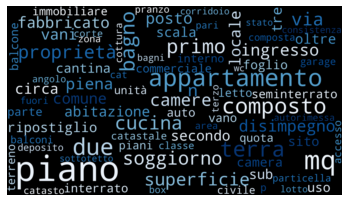

In [22]:
text = ' '.join(df['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.2** **WordCloud per tutte le descrizioni dei beni con categoria RESIDENTIAL**: 

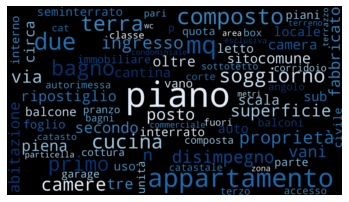

In [23]:
# Seleziono solo i beni residential:
df_residential = df[df["Destinazione_Uso"] == "RESIDENTIAL"]

text = ' '.join(df_residential['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Residential.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.3** **WordCloud per tutte le descrizioni dei beni con categoria RETAIL**: 

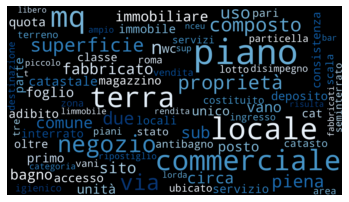

In [24]:
# Seleziono solo i beni RETAIL:
df_retail = df[df["Destinazione_Uso"] == "RETAIL"]

text = ' '.join(df_retail['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Retail.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.4** **WordCloud per tutte le descrizioni dei beni con categoria LAND**: 

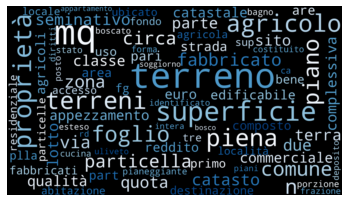

In [25]:
# Seleziono solo i beni LAND:
df_land = df[df["Destinazione_Uso"] == "LAND"]

text = ' '.join(df_land['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Land.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.5** **WordCloud per tutte le descrizioni dei beni con categoria INDUSTRIAL**: 

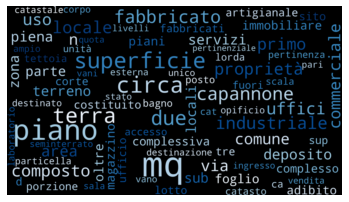

In [26]:
# Seleziono solo i beni INDUSTRIAL:
df_industrial = df[df["Destinazione_Uso"] == "INDUSTRIAL"]

text = ' '.join(df_industrial['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Industrial.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.6** **WordCloud per tutte le descrizioni dei beni con categoria STORAGE**: 

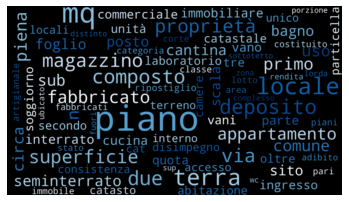

In [27]:
# Seleziono solo i beni STORAGE:
df_storage = df[df["Destinazione_Uso"] == "STORAGE"]

text = ' '.join(df_storage['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Storage.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.7** **WordCloud per tutte le descrizioni dei beni con categoria HOTEL**: 

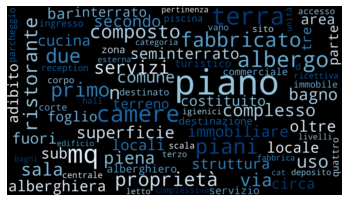

In [28]:
# Seleziono solo i beni HOTEL:
df_hotel = df[df["Destinazione_Uso"] == "HOTEL"]

text = ' '.join(df_hotel['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Hotel.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

- **5.8** **WordCloud per tutte le descrizioni dei beni con categoria AGRICULTURAL BUILDING**: 

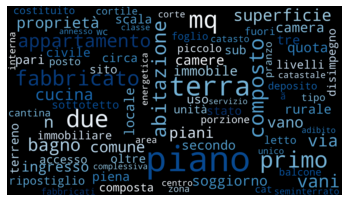

In [29]:
# Seleziono solo i beni AGRICULTURAL BUILDING:
df_agri_buil = df[df["Destinazione_Uso"] == "AGRICULTURAL BUILDING"]

text = ' '.join(df_agri_buil['Descrizione_Bene_EDA'].astype(str))

wordcloud = WordCloud(stopwords=italian_stopwords,
                      max_words=80,
                      width=3840,
                      height=2160,
                      min_font_size=40,
                      max_font_size=400,
                      colormap='Blues_r',
                      background_color="black",
                      collocations=False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

# Salvo l'immagine:
plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici_&_Benchmark\\Grafici_Script_9\\WordCloud_Descrizione_Agri.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.axis("off")
plt.show()

### 6. Elimino gli outliers individuati nella Exploratory Data Alysis eseguita finora

In [30]:
# Inserisco in una lista tramite la loro posizione in indice tutti gli outliers per superfice e numero vani ritrovati: 
rows_to_drop = [12760, 17292, 32842, 32843, 32844, 32845, 32846, 32847, 32848, 32849, 32850, 32851, 32852, 32853, 32854, 
                32855, 32856, 32859, 32860, 32861, 32862, 32863, 32864, 32865, 32866, 32867, 32868, 47972, 47973, 47974, 
                77021, 77042, 77043, 77044, 119691, 119692, 156550]

rows_to_drop = list(set(rows_to_drop))

# Mostro il numero di outliers ritrovati:
print("Outliers individuati da eliminare dal data frame: ", 
      '\033[1m','\033[15;31;43m', len(rows_to_drop),'\033[0m')

Outliers individuati da eliminare dal data frame:    37 


In [31]:
print("Numero di beni nel data frame:", '\033[1m','\033[15;31;43m', 
      df.shape[0],'\033[0m')

# Elimino tramite la loro posizione nell'indice gli outliers individuati:
df.drop(index=rows_to_drop, inplace=True)

# Resetto l'indice e lo riporto progressivo:
df.reset_index(drop=True, inplace=True)

print("Numero di beni nel data frame dopo aver eliminto gli outliers individuati:", '\033[1m','\033[15;31;43m', 
      df.shape[0],'\033[0m')

Numero di beni nel data frame:   166040 
Numero di beni nel data frame dopo aver eliminto gli outliers individuati:   166003 


### 7 - Conclusioni

- La colonna **"Descrizione del bene" è stata pulita da simboli e da encoded characters** letti male durante la fase di estrazione;


- Quindi è stata creata una nuova colonna pulita denominata **"Descrizione_Bene_Clean"** utile per eseguire la prima fase della EDA sulla variabile testuale;


- Da questa variabile pulita sono state create **due nuove colonne**, ovvero una che **conta il numero di parole per descrizione per singolo bene** ed una che **calcola il numero medio di caratteri per parola per descrizione**;


- Da queste due colonne create sono state visualizzate le **relative distribuzioni e si evince come ci fossero 37 outliers**, successivamente eliminati. Gli outliers mostravano per il campo avegare mean character e per il numero di parole per descrizone, un valore eccessivamente troppo alto o troppo basso.


- A tal riguardo, il **numero medio di caratteri per parola per descrizione** è di **5.6**, mentre il **numero medio di parole** per descrizone è di **37.4**.


- Successivamente è stata **creata un'ulteriore colonna**, utile per eseguire la seconda fase di exploration data analysis, ovvero una **colonna testuale che non prevede ne capital letters ne punctuation** al suo interno.


- Da questa colonna è stata eseguita il **conteggio degli unigram** (**totale unigram: 87604**), il **conteggio dei bigram** (**totale bigram: 621965**), e dei **trigram** (**totale trigram: 1340317**).


- Successivamente sono state calcolate secondo la funzione di NLTK denominata TextBlob, le part of speech della variabile pulita (POS), ottenendo i seguenti risultati:
    - Ci sono **214 NN** come categoria di Tag principale, equivalente ai **Noun**, ovvero i sostantivi;
    - Ci sono **55 NNP** come categoria di Tag secondaria, quivalente ai **Noun proper**, ovvero i nomi propri singolari;
    - Come terzo tag per numerosità è presente **CD**, **33**, ovvero **cardinal number**, i numeri;
    - In quarta posizione c'è il tag **JJ**, **29**, identificante gli **aggettivi**, sia quantitativi che qualitativi;
    
- Nella parte conclusiva sono state create con la funzione **WordCloud 8 plots**, una **generica iniziale** ed una **per ogni destinazione d'uso**, mostrando quali sono le stringhe più menzionate all'interno del campo descrizione dopo la relativa pulizia.

- Infine i **37 outliers sono stati eliminati** dal data frame, ottenendo un nuovo **data frame da 166003 beni per 16 colonne**, sia numeriche che descrittive.

### 8 - Export data frame in formato CSV

In [32]:
df_csv = df.to_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\10_Dataset_Pre_Processing_Var_Text\\Dataset_Pre_Processing_Var_Text.csv",
                   index=False)